<a href="https://colab.research.google.com/github/Jcain17/Intro_to_ML/blob/main/ML_HW_3_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/cancer.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Binary map for M and B of the diagnosis

def binmap(x):
   return x.map({'M': 1, 'B': 0})

dataset[['diagnosis']] = dataset[['diagnosis']].apply(binmap)
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#Set X and Y
x_vars = np.arange(2,31,1)
X = dataset.iloc[:, x_vars].values
Y = dataset.iloc[:, 1].values

X[0:2]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01]])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Start the confusion matrix

cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[65,  2],
       [ 3, 44]])

In [ ]:
# Values for accuracy, precision, and recall

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1:",metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1: 0.9462365591397849


Text(0.5, 427.9555555555555, 'Predicted label')

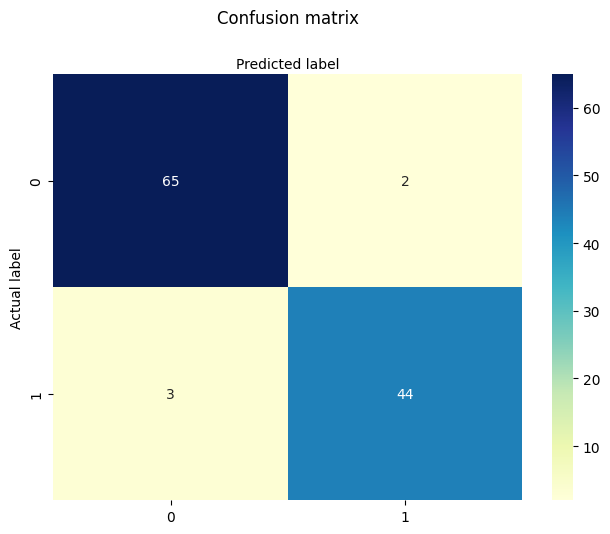

In [ ]:
# Create the visualization of the confusion matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create the heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#Problem 2B

C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X_train, Y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X_train, Y_train))
    print('Test accuracy:', clf.score(X_test, Y_test))
    print('')

C: 10
Training accuracy: 0.9868131868131869
Test accuracy: 0.9649122807017544

C: 1
Training accuracy: 0.9912087912087912
Test accuracy: 0.956140350877193

C: 0.1
Training accuracy: 0.9758241758241758
Test accuracy: 0.9736842105263158

C: 0.001
Training accuracy: 0.6373626373626373
Test accuracy: 0.5877192982456141



In [ ]:
#0.1 has the smallest difference accuracy
# remake the confusion
c = 0.1

clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
clf.fit(X_train, Y_train)
print('C:', c)
print('Training accuracy:', clf.score(X_train, Y_train))
print('Test accuracy:', clf.score(X_test, Y_test))

C: 0.1
Training accuracy: 0.9758241758241758
Test accuracy: 0.9736842105263158


In [ ]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[65,  2],
       [ 3, 44]])

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1:",metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1: 0.9462365591397849


Text(0.5, 427.9555555555555, 'Predicted label')

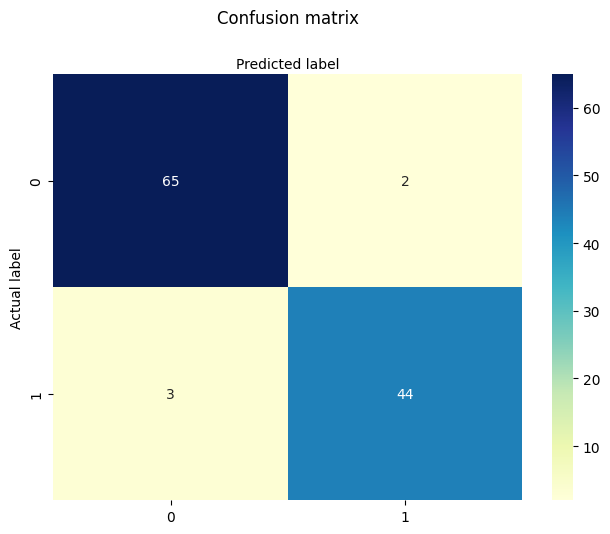

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create the heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')